In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('datasets/dataset_train.csv')
df_train

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1595,Gryffindor,Jung,Blank,2001-09-14,Right,49009.0,354.280086,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83
1596,1596,Slytherin,Shelli,Lock,1998-03-12,Left,63296.0,367.531174,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80
1597,1597,Gryffindor,Benjamin,Christensen,1999-10-24,Right,63905.0,544.018925,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47
1598,1598,Hufflepuff,Charlotte,Dillon,2001-09-21,Left,82713.0,453.676219,3.442831,-4.536762,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-0.531875,-246.19072,-76.81


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Index                          1600 non-null   int64  
 1   Hogwarts House                 1600 non-null   object 
 2   First Name                     1600 non-null   object 
 3   Last Name                      1600 non-null   object 
 4   Birthday                       1600 non-null   object 
 5   Best Hand                      1600 non-null   object 
 6   Arithmancy                     1566 non-null   float64
 7   Astronomy                      1568 non-null   float64
 8   Herbology                      1567 non-null   float64
 9   Defense Against the Dark Arts  1569 non-null   float64
 10  Divination                     1561 non-null   float64
 11  Muggle Studies                 1565 non-null   float64
 12  Ancient Runes                  1565 non-null   f

In [4]:
df_train['Hogwarts House'].value_counts()

Hufflepuff    529
Ravenclaw     443
Gryffindor    327
Slytherin     301
Name: Hogwarts House, dtype: int64

In [5]:
df_train.describe()

,Index,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
count,1600.00000,1566.000000,1568.000000,1567.000000,1569.000000,1561.000000,1565.000000,1565.000000,1557.000000,1566.000000,1570.000000,1560.000000,1600.000000,1600.000000
mean,799.50000,49634.570243,39.797131,1.141020,-0.387863,3.153910,-224.589915,495.747970,2.963095,1030.096946,5.950373,-0.053427,-243.374409,21.958012
std,462.02453,16679.806036,520.298268,5.219682,5.212794,4.155301,486.344840,106.285165,4.425775,44.125116,3.147854,0.971457,8.783640,97.631602
min,0.00000,-24370.000000,-966.740546,-10.295663,-10.162119,-8.727000,-1086.496835,283.869609,-8.858993,906.627320,-4.697484,-3.313676,-261.048920,-181.470000
25%,399.75000,38511.500000,-489.551387,-4.308182,-5.259095,3.099000,-577.580096,397.511047,2.218653,1026.209993,3.646785,-0.671606,-250.652600,-41.870000
50%,799.50000,49013.500000,260.289446,3.469012,-2.589342,4.624000,-419.164294,463.918305,4.378176,1045.506996,5.874837,-0.044811,-244.867765,-2.515000
75%,1199.25000,60811.250000,524.771949,5.419183,4.904680,5.667000,254.994857,597.492230,5.825242,1058.436410,8.248173,0.589919,-232.552305,50.560000
max,1599.00000,104956.000000,1016.211940,11.612895,9.667405,10.032000,1092.388611,745.396220,11.889713,1098.958201,13.536762,3.056546,-225.428140,279.070000


In [6]:
df_train_num = df_train.drop(['Index', 'Hogwarts House', 'First Name', 'Last Name', 'Birthday', 'Best Hand'], axis=1)
scaler = StandardScaler()
tmp = pd.DataFrame(scaler.fit_transform(df_train_num), columns=df_train_num.columns)
df_train = pd.concat([df_train[['Index', 'Hogwarts House', 'First Name', 'Last Name', 'Birthday', 'Best Hand']], tmp], axis=1)
df_train

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,0.524720,-1.014517,0.878909,1.010668,0.377492,1.021466,0.345749,0.512609,0.219703,-0.686402,0.792225,1.204930,-0.500486
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,1.055771,-1.137898,-1.366126,1.133817,-2.110249,-0.540429,-1.204576,0.258586,0.653978,0.412593,0.149413,-1.003297,-1.387362
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,-1.555225,-0.780327,1.261782,0.776918,0.718852,1.829500,1.005516,0.133914,1.314669,0.882837,-0.475624,1.825755,0.086700
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,-1.017577,1.264958,-1.463820,-1.264517,0.209941,-0.642571,0.265730,-1.756806,-2.487031,-1.629712,0.040557,-1.534279,1.830738
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,0.631110,0.763225,-1.717442,NaN,-0.220972,-0.451825,0.974827,-1.448228,-2.100659,-0.520936,-0.216902,-1.481955,1.393652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1595,Gryffindor,Jung,Blank,2001-09-14,Right,-0.037517,0.604621,-1.089084,-0.605423,0.613411,-0.560780,1.152667,-1.852207,-1.493438,-0.813920,-0.614281,-0.799418,1.678998
1596,1596,Slytherin,Shelli,Lock,1998-03-12,Left,0.819302,0.630097,0.942896,-0.630851,-0.336283,-0.861148,-0.469834,-0.163862,0.590565,-0.039757,-0.288870,-0.347662,0.234034
1597,1597,Gryffindor,Benjamin,Christensen,1999-10-24,Right,0.855825,0.969411,-0.832556,-0.969526,0.700797,-0.330243,1.312583,-2.022296,-1.728145,-1.347558,0.128710,-0.940950,1.808504
1598,1598,Hufflepuff,Charlotte,Dillon,2001-09-21,Left,1.983776,0.795719,0.441128,-0.796161,0.862811,-1.248796,-1.056958,0.192122,1.311515,-0.650260,-0.492663,-0.320732,-1.011956


In [7]:
df_train_houses_encoded, df_train_houses_categories = df_train['Hogwarts House'].factorize()
encoder = OneHotEncoder()
houses_1hot = encoder.fit_transform(df_train_houses_encoded.reshape(-1, 1))
tmp = pd.DataFrame(houses_1hot.toarray(), columns=df_train_houses_categories)
df_train = pd.concat([tmp, df_train.drop(['Hogwarts House', 'Index'], axis=1)], axis=1)
df_train

,Ravenclaw,Slytherin,Gryffindor,Hufflepuff,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,...,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,1.0,0.0,0.0,0.0,Tamara,Hsu,2000-03-30,Left,0.524720,-1.014517,...,1.010668,0.377492,1.021466,0.345749,0.512609,0.219703,-0.686402,0.792225,1.204930,-0.500486
1,0.0,1.0,0.0,0.0,Erich,Paredes,1999-10-14,Right,1.055771,-1.137898,...,1.133817,-2.110249,-0.540429,-1.204576,0.258586,0.653978,0.412593,0.149413,-1.003297,-1.387362
2,1.0,0.0,0.0,0.0,Stephany,Braun,1999-11-03,Left,-1.555225,-0.780327,...,0.776918,0.718852,1.829500,1.005516,0.133914,1.314669,0.882837,-0.475624,1.825755,0.086700
3,0.0,0.0,1.0,0.0,Vesta,Mcmichael,2000-08-19,Left,-1.017577,1.264958,...,-1.264517,0.209941,-0.642571,0.265730,-1.756806,-2.487031,-1.629712,0.040557,-1.534279,1.830738
4,0.0,0.0,1.0,0.0,Gaston,Gibbs,1998-09-27,Left,0.631110,0.763225,...,NaN,-0.220972,-0.451825,0.974827,-1.448228,-2.100659,-0.520936,-0.216902,-1.481955,1.393652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.0,0.0,1.0,0.0,Jung,Blank,2001-09-14,Right,-0.037517,0.604621,...,-0.605423,0.613411,-0.560780,1.152667,-1.852207,-1.493438,-0.813920,-0.614281,-0.799418,1.678998
1596,0.0,1.0,0.0,0.0,Shelli,Lock,1998-03-12,Left,0.819302,0.630097,...,-0.630851,-0.336283,-0.861148,-0.469834,-0.163862,0.590565,-0.039757,-0.288870,-0.347662,0.234034
1597,0.0,0.0,1.0,0.0,Benjamin,Christensen,1999-10-24,Right,0.855825,0.969411,...,-0.969526,0.700797,-0.330243,1.312583,-2.022296,-1.728145,-1.347558,0.128710,-0.940950,1.808504
1598,0.0,0.0,0.0,1.0,Charlotte,Dillon,2001-09-21,Left,1.983776,0.795719,...,-0.796161,0.862811,-1.248796,-1.056958,0.192122,1.311515,-0.650260,-0.492663,-0.320732,-1.011956


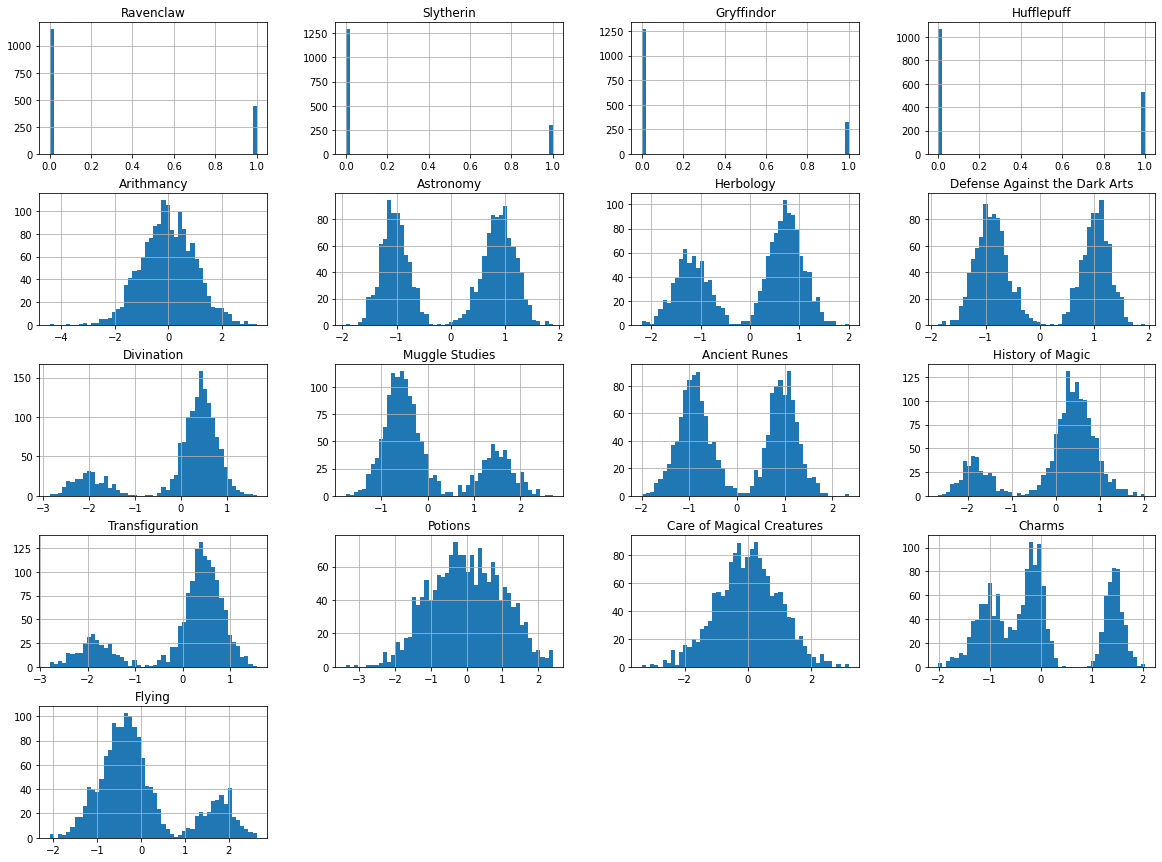

In [8]:
df_train.hist(bins=50, figsize=(20, 15))
None

In [9]:
imputer = SimpleImputer(strategy='median')
df_train_num = df_train.drop(['First Name', 'Last Name', 'Birthday', 'Best Hand'], axis=1)
df_train_fillna = imputer.fit_transform(df_train_num)
df_tr = pd.DataFrame(df_train_fillna, columns=df_train_num.columns)
df_tr

,Ravenclaw,Slytherin,Gryffindor,Hufflepuff,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,1.0,0.0,0.0,0.0,0.524720,-1.014517,0.878909,1.010668,0.377492,1.021466,0.345749,0.512609,0.219703,-0.686402,0.792225,1.204930,-0.500486
1,0.0,1.0,0.0,0.0,1.055771,-1.137898,-1.366126,1.133817,-2.110249,-0.540429,-1.204576,0.258586,0.653978,0.412593,0.149413,-1.003297,-1.387362
2,1.0,0.0,0.0,0.0,-1.555225,-0.780327,1.261782,0.776918,0.718852,1.829500,1.005516,0.133914,1.314669,0.882837,-0.475624,1.825755,0.086700
3,0.0,0.0,1.0,0.0,-1.017577,1.264958,-1.463820,-1.264517,0.209941,-0.642571,0.265730,-1.756806,-2.487031,-1.629712,0.040557,-1.534279,1.830738
4,0.0,0.0,1.0,0.0,0.631110,0.763225,-1.717442,-0.422457,-0.220972,-0.451825,0.974827,-1.448228,-2.100659,-0.520936,-0.216902,-1.481955,1.393652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.0,0.0,1.0,0.0,-0.037517,0.604621,-1.089084,-0.605423,0.613411,-0.560780,1.152667,-1.852207,-1.493438,-0.813920,-0.614281,-0.799418,1.678998
1596,0.0,1.0,0.0,0.0,0.819302,0.630097,0.942896,-0.630851,-0.336283,-0.861148,-0.469834,-0.163862,0.590565,-0.039757,-0.288870,-0.347662,0.234034
1597,0.0,0.0,1.0,0.0,0.855825,0.969411,-0.832556,-0.969526,0.700797,-0.330243,1.312583,-2.022296,-1.728145,-1.347558,0.128710,-0.940950,1.808504
1598,0.0,0.0,0.0,1.0,1.983776,0.795719,0.441128,-0.796161,0.862811,-1.248796,-1.056958,0.192122,1.311515,-0.650260,-0.492663,-0.320732,-1.011956


In [10]:
corr_matrix = df_tr.corr()
corr_matrix

,Ravenclaw,Slytherin,Gryffindor,Hufflepuff,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
Ravenclaw,1.000000,-0.297861,-0.313614,-0.434879,-0.007005,-0.610838,0.454145,0.612257,0.269529,0.885426,0.591705,0.269214,0.280398,0.200700,0.036001,0.866331,-0.164442
Slytherin,-0.297861,1.000000,-0.243971,-0.338308,-0.007405,-0.488010,-0.539586,0.488321,-0.900898,-0.248734,-0.419138,0.214872,0.234227,0.530929,-0.016427,-0.340914,-0.455124
Gryffindor,-0.313614,-0.243971,1.000000,-0.356199,-0.015434,0.438490,-0.567726,-0.438675,0.210476,-0.284219,0.477192,-0.880314,-0.896236,-0.483686,-0.044830,-0.540058,0.867550
Hufflepuff,-0.434879,-0.338308,-0.356199,1.000000,0.026044,0.610544,0.502935,-0.611995,0.311638,-0.391911,-0.623635,0.320013,0.306944,-0.217359,0.017831,-0.077873,-0.209137
Arithmancy,-0.007005,-0.007405,-0.015434,0.026044,1.000000,-0.033761,-0.015937,0.037174,-0.002589,-0.055544,0.074291,-0.069563,-0.002249,-0.296969,-0.041246,-0.099611,-0.164464
Astronomy,-0.610838,-0.488010,0.438490,0.610544,-0.033761,1.000000,0.020742,-0.974397,0.467950,-0.559952,-0.189479,-0.397871,-0.432772,-0.546650,-0.012413,-0.514071,0.517346
Herbology,0.454145,-0.539586,-0.567726,0.502935,-0.015937,0.020742,1.000000,-0.024227,0.534995,0.425419,-0.040285,0.492976,0.518698,-0.106672,0.048327,0.736208,-0.265798
Defense Against the Dark Arts,0.612257,0.488321,-0.438675,-0.611995,0.037174,-0.974397,-0.024227,1.000000,-0.467788,0.561086,0.189371,0.399462,0.433640,0.546119,0.010177,0.514250,-0.521606
Divination,0.269529,-0.900898,0.210476,0.311638,-0.002589,0.467950,0.534995,-0.467788,1.000000,0.242338,0.423343,-0.165681,-0.162805,-0.469319,0.022249,0.389815,0.396200
Muggle Studies,0.885426,-0.248734,-0.284219,-0.391911,-0.055544,-0.559952,0.425419,0.561086,0.242338,1.000000,0.553548,0.282520,0.261393,0.181226,0.048808,0.832321,-0.183953


In [11]:
y_train = df_tr[['Ravenclaw', 'Slytherin', 'Gryffindor', 'Hufflepuff']]
y_train

,Ravenclaw,Slytherin,Gryffindor,Hufflepuff
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
1595,0.0,0.0,1.0,0.0
1596,0.0,1.0,0.0,0.0
1597,0.0,0.0,1.0,0.0
1598,0.0,0.0,0.0,1.0


In [12]:
X_train = df_tr.drop(['Ravenclaw', 'Slytherin', 'Gryffindor', 'Hufflepuff', 'Arithmancy', 'Care of Magical Creatures', 'Defense Against the Dark Arts'], axis=1)
X_train

,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying
0,-1.014517,0.878909,0.377492,1.021466,0.345749,0.512609,0.219703,-0.686402,1.204930,-0.500486
1,-1.137898,-1.366126,-2.110249,-0.540429,-1.204576,0.258586,0.653978,0.412593,-1.003297,-1.387362
2,-0.780327,1.261782,0.718852,1.829500,1.005516,0.133914,1.314669,0.882837,1.825755,0.086700
3,1.264958,-1.463820,0.209941,-0.642571,0.265730,-1.756806,-2.487031,-1.629712,-1.534279,1.830738
4,0.763225,-1.717442,-0.220972,-0.451825,0.974827,-1.448228,-2.100659,-0.520936,-1.481955,1.393652
...,...,...,...,...,...,...,...,...,...,...
1595,0.604621,-1.089084,0.613411,-0.560780,1.152667,-1.852207,-1.493438,-0.813920,-0.799418,1.678998
1596,0.630097,0.942896,-0.336283,-0.861148,-0.469834,-0.163862,0.590565,-0.039757,-0.347662,0.234034
1597,0.969411,-0.832556,0.700797,-0.330243,1.312583,-2.022296,-1.728145,-1.347558,-0.940950,1.808504
1598,0.795719,0.441128,0.862811,-1.248796,-1.056958,0.192122,1.311515,-0.650260,-0.320732,-1.011956


In [13]:
class FtLogisticRegression:
    def __init__(self):
        self.weights = None

    def fit(self, X, y, max_iter=1000, learning_rate=1e-7):
        X_cpy = X.copy()
        rows, cols = X_cpy.shape
        self.weights = np.zeros(cols + 1)
        X_cpy = np.concatenate((np.ones((rows, 1)), X_cpy), axis=1)
        for it in range(max_iter):
            p = self._sigmoid(self._logit(X_cpy))
            grad = (1.0 / rows) * np.dot(X_cpy.T, (p - y))
            self.weights -= learning_rate * grad

    def predict_proba(self, X):
        rows = X.shape[0]
        X_cpy = np.concatenate((np.ones((rows, 1)), X), axis=1)
        return self._sigmoid(self._logit(X_cpy))

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold

    def get_weights(self):
        return self.weights

    def _sigmoid(self, t):
        return 1.0 / (1 + np.exp(-t))

    def _logit(self, X):
        return np.dot(X, self.weights)

    def _log_loss(self, y, p):
        p = np.clip(p, 1e-10, 1 - 1e-10)
        return np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

In [14]:
y_train_gryffindor = y_train['Gryffindor']
y_train_gryffindor

0       0.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
1595    1.0
1596    0.0
1597    1.0
1598    0.0
1599    0.0
Name: Gryffindor, Length: 1600, dtype: float64

In [15]:
logistic_clf = FtLogisticRegression()
logistic_clf.fit(X_train, y_train_gryffindor)
y_pred = logistic_clf.predict(X_train, threshold=0.5)

In [16]:
accuracy_score(y_train_gryffindor, y_pred)

0.985

In [17]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train_gryffindor)
y_pred_sklearn = clf.predict(X_train)
accuracy_score(y_train_gryffindor, y_pred)

0.985

In [18]:
logistic_clf.get_weights()

array([-2.95621235e-05,  1.72838102e-05, -2.29733668e-05,  8.14060269e-06,
       -1.10951632e-05,  1.92425086e-05, -3.53182723e-05, -3.60180908e-05,
       -1.93062200e-05, -2.17762674e-05,  3.49816214e-05])

In [22]:
class FtOneVsAll:
    def __init__(self, clf):
        self.clf = clf
        self.weights = None

    def fit(self, X_train, y_train):
        n = y_train.shape[1]
        cols = X_train.shape[1]
        self.weights = np.zeros((n, cols + 1))
        print(self.weights)

In [23]:
logistic_clf = FtLogisticRegression()
multi_clf = FtOneVsAll(logistic_clf)
multi_clf.fit(X_train, y_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
